In [137]:
import cv2
from matplotlib import pyplot as plt
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir="dataset/train/"
test_dir="dataset/test/"

img=cv2.imread("dataset/train/happy/im0.png")
img_size=img.shape[0]
print(img_size)



48


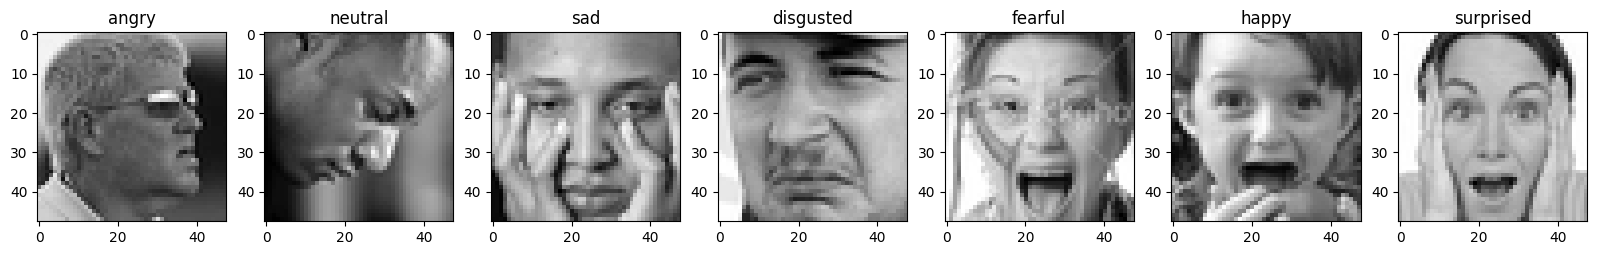

In [138]:
import matplotlib.pyplot as plt
import os

target_var = os.listdir(train_dir)
fig, axes = plt.subplots(1, len(target_var), figsize=(20,8))
for i in range(len(target_var)):
    d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d), cmap='gray')
    axes[i].set_title(target_var[i])
plt.show()


In [147]:
#vgg16 model
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,BatchNormalization,Dropout
import numpy as np

#block n1
model=keras.Sequential()
model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation="relu", input_shape=(img_size,img_size,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))


#block n2
model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#block n3
model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#block n4
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#block n5
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#top 
model.add(Flatten())
model.add(Dense(2048,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(target_var),activation="softmax"))

# result=model.predict(np.array([img_rgb]))

# print(result)





In [148]:
#model compile and optimizer
from keras.optimizers import Adam,RMSprop,SGD,Adamax

model.compile(
    optimizer = Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [149]:
model.build()
model.summary()

Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_623 (Conv2D)             │ (None, 48, 48, 64)        │        640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_30          │ (None, 48, 48, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_273               │ (None, 24, 24, 64)        │          0 │
│ (MaxPooling2D)                  │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_36 (Dropout)            │ (None, 24, 24, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_624 (Conv2D)             │ (None, 24, 24, 128)       │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_625 (Conv2D)             │ (None, 24, 24, 128)       │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_31          │ (None, 24, 24, 128)       │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_274               │ (None, 12, 12, 128)       │          0 │
│ (MaxPooling2D)                  │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_37 (Dropout)            │ (None, 12, 12, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_626 (Conv2D)             │ (None, 12, 12, 256)       │    295,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_627 (Conv2D)             │ (None, 12, 12, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_32          │ (None, 12, 12, 256)       │      1,024 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_275               │ (None, 6, 6, 256)         │          0 │
│ (MaxPooling2D)                  │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_38 (Dropout)            │ (None, 6, 6, 256)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_628 (Conv2D)             │ (None, 6, 6, 512)         │  1,180,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_629 (Conv2D)             │ (None, 6, 6, 512)         │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_33          │ (None, 6, 6, 512)         │      2,048 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_276               │ (None, 3, 3, 512)         │          0 │
│ (MaxPooling2D)                  │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_39 (Dropout)            │ (None, 3, 3, 512)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_630 (Conv2D)             │ (None, 3, 3, 512)         │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_631 (Conv2D)             │ (None, 3, 3, 512)         │  2,359,80

 Total params: 10,437,767 (39.82 MB)

 Trainable params: 10,434,823 (39.81 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [150]:
#data augmentation 

train_datagen=ImageDataGenerator(rotation_range=180, #rotates the image with the amount of degrees we provide
                                         width_shift_range=0.1, #shifts the image randomly to the right or left along the width of the image
                                         height_shift_range=0.1, #shifts image randomly to up or below along the height of the image
                                         horizontal_flip=True, #flips the image horizontally
                                         rescale=1./255, #to scale down the pizel values in our image between 0 and 1
                                         zoom_range=0.2, #applies random zoom to our object
                                         validation_split=0.2 #reserves some images to be used for validation purpose
                                        )
validation_datagen=ImageDataGenerator(rescale=1./255,
                                         validation_split=0.2)

In [151]:
epochs = 200
batch_size = 64

In [152]:
#apply data augmentation

train_generator=train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator=validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )


Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [159]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [153]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)


Epoch 1/200


/home/gojo/projects/emotion_recon/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 187s 514ms/step - accuracy: 0.2018 - loss: 2.2729 - val_accuracy: 0.1110 - val_loss: 2.9999
Epoch 2/200
249/359 ━━━━━━━━━━━━━━━━━━━━ 57s 522ms/step - accuracy: 0.2341 - loss: 1.8384

KeyboardInterrupt: 

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('model.h5')


In [ ]:
img = image.load_img("../input/emotion-detection-fer/test/happy/im1021.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) 

In [ ]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}


In [ ]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)


In [ ]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()


In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

In [ ]:
model.save_weights('model_weights.h5')
